### Practice Project - Linear Regression based :  Using dataset (Advertising.csv)

### Table of Contents<br>
    Problem statement
    1. Introduction
    2. Linear Regression Steps
        2.1 Importing Our Libraries
        2.2 Reading the data
        2.3 Assumptions Check
        2.4 Preprocessing and Understanding the data
        2.5 Splitting the data into train and test
        2.6 Running your First Machine Leraning Algorithm
        2.7 Evaluation
            2.7.1 RMSE
            2.7.2 R Squared
        2.8 Finalizing Stuff


### 1. Introduction

• Regression is a statistical technique which helps you to measure the relationship 
between the independent variables and dependent variables

• It helps you to understand one unit change in the independent variables is going to 
cause how many units change in the dependent variable 

• Dependent or predicted variable is represented as ‘y’

### 2. Linear Regression Steps:

#### 2.1 Importing Our Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.2 Reading the data

Here two important things 

1. index_col is by default none and header is 0

2. Make use of proper function depending on the extension of the file

In [3]:
data = pd.read_csv(r'Advertising.csv',index_col = 0)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### 2.3 Assumptions Check

Assumption 1: There should be no outliers in the data

In [13]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


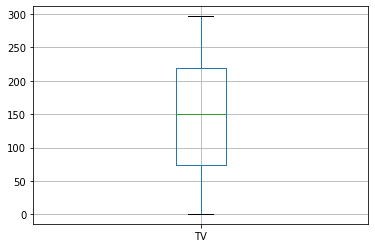

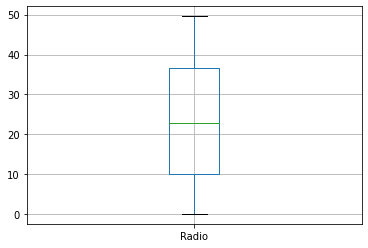

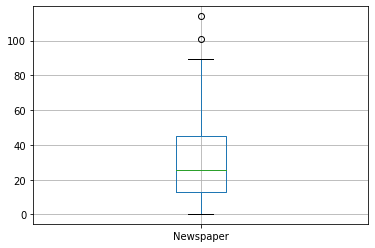

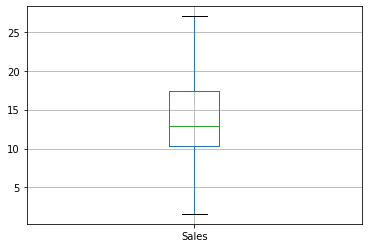

In [14]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

Assumption 2: Assumption of Linearity : Every independent variable should have a linear relationship 
with the dependent variable

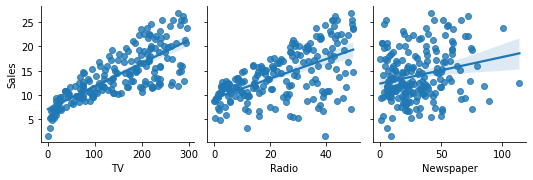

In [16]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],
            y_vars="Sales",kind='reg')

 Assumption 3: Assumption of no multicollinearity means the independewnt variable should not be correalated with each other

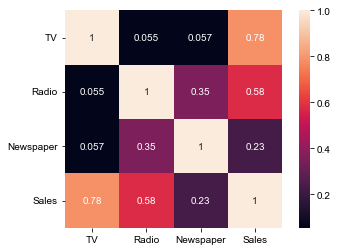

In [18]:
corr = data.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
sns.set(rc = {'figure.figsize':(15,8)})
plt.show()

#### 2.4 Preprocessing and Understanding the data

In [5]:
data.shape

(200, 4)

In [11]:
data.isnull()

,TV,Radio,Newspaper,Sales
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False
199,False,False,False,False


In [12]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

So as there are no null values in the data we don't need any sort of missing values handling bt lets consider a example where we have missing values and we treat it using mean median and mode or we can delete the column itself.

#### 2.5 Splitting the data into train and test

In [19]:
x = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [20]:
import sklearn

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [22]:
print(x_train.shape)
print(x_test.shape)

(160, 3)
(40, 3)


In [23]:
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)


#### 2.6 Running your First Machine Leraning Algorithm

In [24]:
from sklearn.linear_model import LinearRegression

lm =LinearRegression()

lm.fit(x_train,y_train)

LinearRegression()

In [25]:
print(lm.intercept_)

[3.25409711]


In [26]:
print(lm.coef_)

[[ 0.0437726   0.19343299 -0.00222879]]


In [27]:
y_pred = lm.predict(x_test)
print(y_pred)

[[18.1625299 ]
 [12.92663232]
 [18.0531098 ]
 [23.64464668]
 [20.70438374]
 [14.28227997]
 [14.94493548]
 [21.38232981]
 [21.17508238]
 [12.73110461]
 [24.00312134]
 [ 7.21544071]
 [12.24762152]
 [19.24345998]
 [19.38241854]
 [13.45643798]
 [19.6247089 ]
 [ 9.2531648 ]
 [21.13268075]
 [20.90762408]
 [15.53485445]
 [10.92529369]
 [22.82955184]
 [15.8122438 ]
 [17.42515749]
 [ 8.16218669]
 [11.89783444]
 [12.70337575]
 [21.74138085]
 [ 7.96215368]
 [12.50099965]
 [20.45535282]
 [ 4.72120047]
 [ 4.72259288]
 [16.75292333]
 [15.75804986]
 [ 6.74415499]
 [17.73477354]
 [ 9.01591827]
 [13.617599  ]]


#### 2.7 Evaluation

##### 2.7.1 RMSE:


• Root Mean Square error is an absolute measure of the goodness for the fit


• It gives an absolute number on how much your predicted results deviate from the 
actual number 

• Low the RMSE better the model

##### 2.7.2 R Squared:


• It tells you how well the regression model is predicting as compared to the mean model 


• Lies between (0-1)


• If R squared is close to 1 → very good model

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_test,y_pred)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('R-squared', r2)
print('RMSE', rmse)


R-squared 0.8353672324670594
RMSE 2.58852984462781


#### 2.8 Finalizing Stuff

In [31]:
new_data = pd.DataFrame()
new_data = (x_test)

new_data['Actual_Sales'] = y_test
new_data['Predicted_Sales'] = y_pred

In [32]:
new_data

,TV,Radio,Newspaper,Actual_Sales,Predicted_Sales
60,210.7,29.5,9.3,18.4,18.162530
6,8.7,48.9,75.0,7.2,12.926632
21,218.4,27.7,53.4,18.0,18.053110
199,283.6,42.0,66.2,25.5,23.644647
53,216.4,41.7,39.6,22.6,20.704384
20,147.3,23.9,19.1,14.6,14.282280
163,188.4,18.1,25.6,14.9,14.944935
56,198.9,49.4,60.0,23.7,21.382330
70,216.8,43.9,27.2,22.3,21.175082
3,17.2,45.9,69.3,9.3,12.731105


In [ ]:
#new_data.to_csv('predictions.csv')

<hr>